<a href="https://colab.research.google.com/github/cjassey/API---Webscrapping/blob/master/Keypoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# Train Soccer Pitch Keypoint Detector

---

[![Download Dataset](https://app.roboflow.com/images/download-dataset-badge.svg)](https://universe.roboflow.com/roboflow-jvuqo/football-field-detection-f07vi)

This notebook is based on the [How to Train a YOLOv8 Keypint Detection Model](https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-keypoint.ipynb) notebook from the [roboflow/notebooks](https://github.com/roboflow/notebooks) repository.

## Configure API keys

- Open your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Thu Nov 21 12:57:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install dependencies

In [ ]:
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.1 MB/s eta 0:00:00


## Imports

In [ ]:
from roboflow import Roboflow
from google.colab import userdata
from IPython.display import Image

## Pull dataset

Récupère le dataset sur roboflow avec le data.yaml qui donne les infos sur les keypoinsts

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="amee3SgnA43lsCG9D1Y8")
project = rf.workspace("rugbyvision").project("rugby.vision.field")
version = project.version(4)
dataset = version.download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to RUgby.Vision.Field-4 in yolov8:: 100%|██████████| 794/794 [00:01<00:00, 603.99it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**NOTE:** Update `data.yaml` structure to align with the latest requirements of the `ultralytics` package.

In [ ]:
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

## Custom training

Train le model sous yolov8

In [ ]:
%cd {HOME}

!yolo task=pose mode=train model=yolov8x-pose.pt data={dataset.location}/data.yaml batch=16 epochs=10 imgsz=640 mosaic=0.0 plots=True

/content
100% 133M/133M [00:00<00:00, 335MB/s]
Ultralytics 8.3.35 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8x-pose.pt, data=/content/datasets/RUgby.Vision.Field-4/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_c

In [ ]:
!ls {HOME}/runs/pose/train/

args.yaml					    labels_correlogram.jpg  train_batch0.jpg
BoxF1_curve.png					    labels.jpg		    train_batch1.jpg
BoxP_curve.png					    PoseF1_curve.png	    train_batch2.jpg
BoxPR_curve.png					    PoseP_curve.png	    val_batch0_labels.jpg
BoxR_curve.png					    PosePR_curve.png	    val_batch0_pred.jpg
confusion_matrix_normalized.png			    PoseR_curve.png	    weights
confusion_matrix.png				    results.csv
events.out.tfevents.1732193883.b1c04df77096.1992.0  results.png


/content


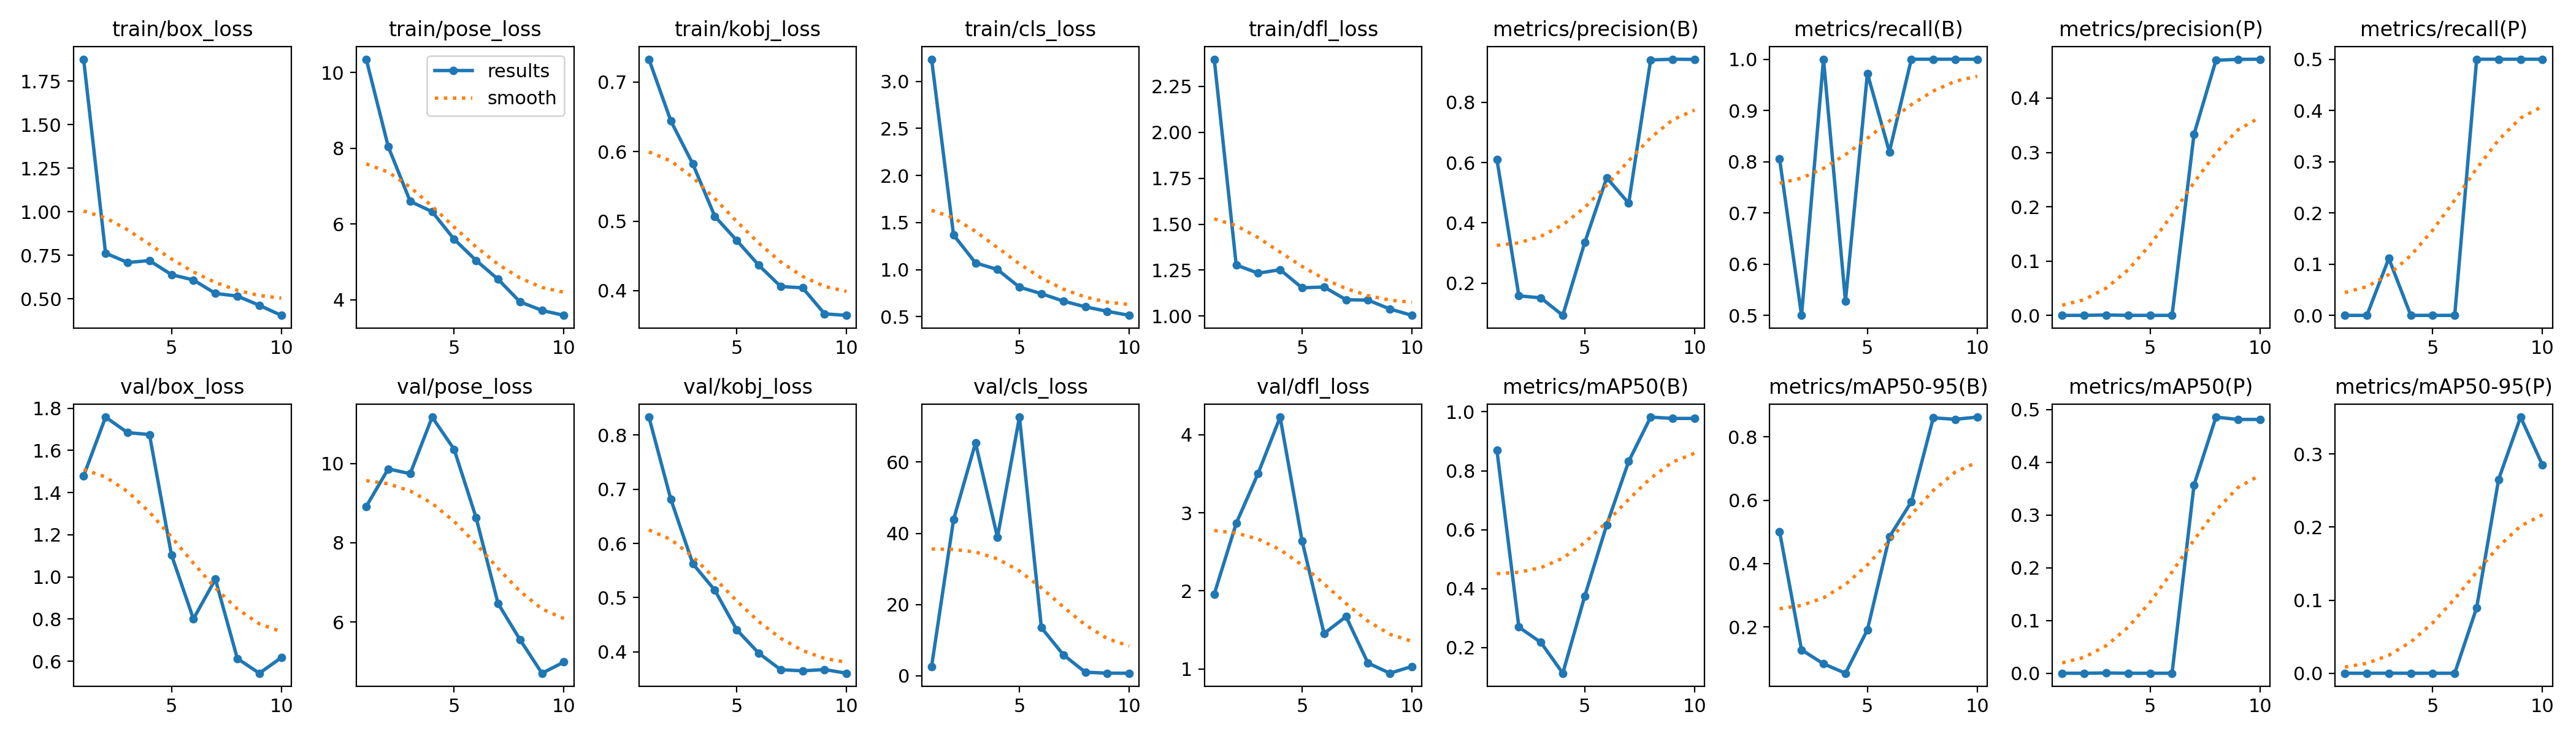

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train/results.png', width=600)

/content


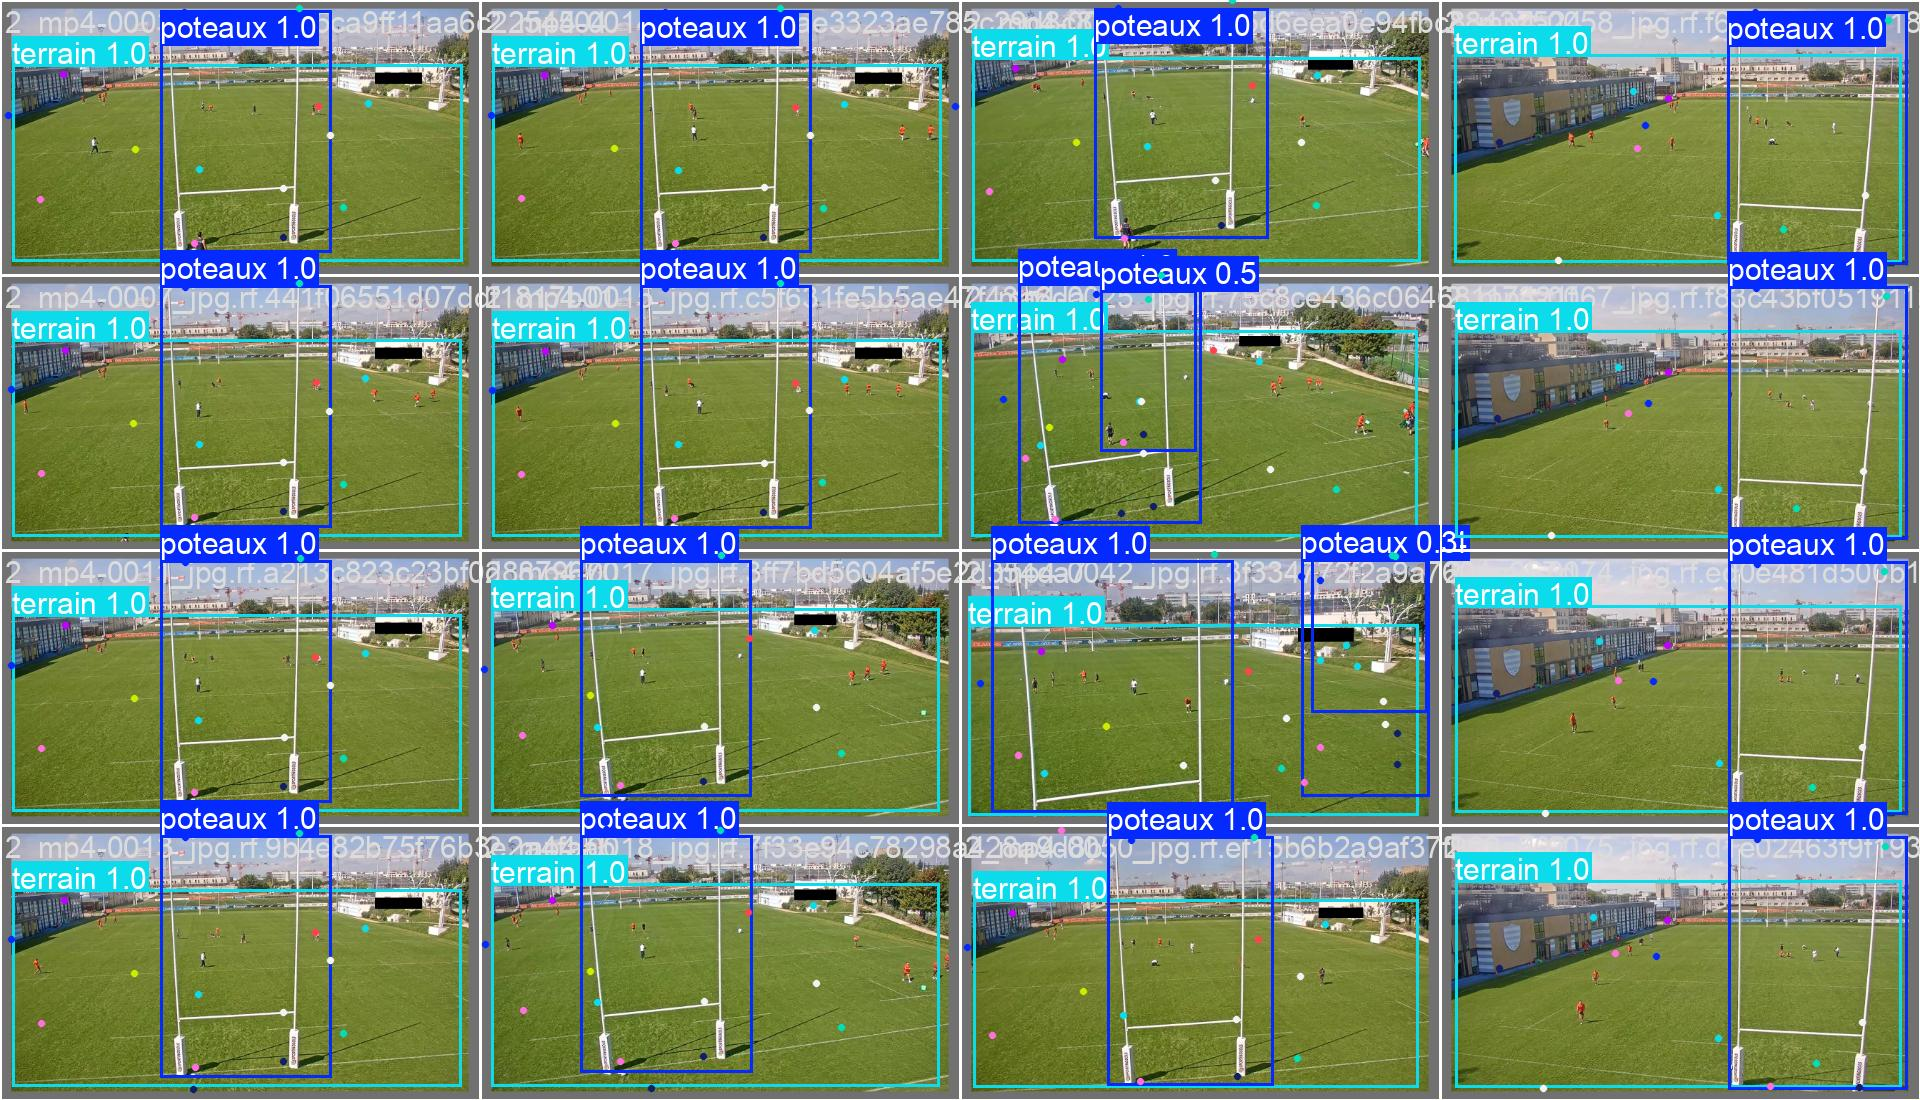

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train/val_batch0_pred.jpg', width=600)

## Validate custom model

In [ ]:
%cd {HOME}

!yolo task=pose mode=val model={HOME}/runs/pose/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-pose summary (fused): 287 layers, 69,463,401 parameters, 0 gradients, 263.2 GFLOPs
val: Scanning /content/datasets/RUgby.Vision.Field-2/valid/labels.cache... 33 images, 0 backgrounds, 13 corrupt: 100% 33/33 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/RUgby.Vision.Field-2/valid/images/video_entrainement_mp4-0007_jpg.rf.e326bda9d315fe84e964d7b85367bca7.jpg: ignoring corrupt image/label: negative label values [ -0.0010416  -0.0010416]
val: WARNING ⚠️ /content/datasets/RUgby.Vision.Field-2/valid/images/video_entrainement_mp4-0008_jpg.rf.1b9bfba33356595d9cefc864ac61af1a.jpg: ignoring corrupt image/label: negative label values [ -0.0010416  -0.0010416]
val: WARNING ⚠️ /content/datasets/RUgby.Vision.Field-2/valid/images/video_entrainement_mp4-0009_jpg.rf.ffc9c7b54cfe53187f94cd67dff6b888.jpg: ignoring corrupt image/label: negative label values [ -0.0010416  -0.0010416]
val: WARNING ⚠️ /con

## Deploy model on Roboflow

Téléchargement du meilleure modele

In [ ]:
from google.colab import files

# Télécharger le meilleur modèle
model = files.download('/content/runs/pose/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Récupère le meilleure modele et place les keypoints sur une image

In [1]:
from ultralytics import YOLO

# Charger le modèle entraîné
model = YOLO("/content/runs/pose/train/weights/best.pt")

# Effectuer une inférence
results = model("/content/datasets/RUgby.Vision.Field-4/valid/images/2_mp4-0003_jpg.rf.c825ca9ff11aa6c2254504b2265e2c08.jpg")
for r in results:
    print(r.boxes)  # Boîtes englobantes
    print(r.keypoints)  # Points clés (pose estimation)


ModuleNotFoundError: No module named 'ultralytics'

Instance 1:
 Keypoint ID 2: x=1470.3983154296875, y=436.0082702636719, confiance=0.777351438999176
 Keypoint ID 7: x=1313.181640625, y=424.1933898925781, confiance=0.9186720848083496
Instance 2:
 Keypoint ID 1: x=736.5572509765625, y=7.10028076171875, confiance=0.7719800472259521
 Keypoint ID 2: x=667.22509765625, y=742.9348754882812, confiance=0.7942672371864319
 Keypoint ID 3: x=1155.58251953125, y=734.1864624023438, confiance=0.7574750781059265
 Keypoint ID 6: x=785.7317504882812, y=984.6910400390625, confiance=0.8854103684425354


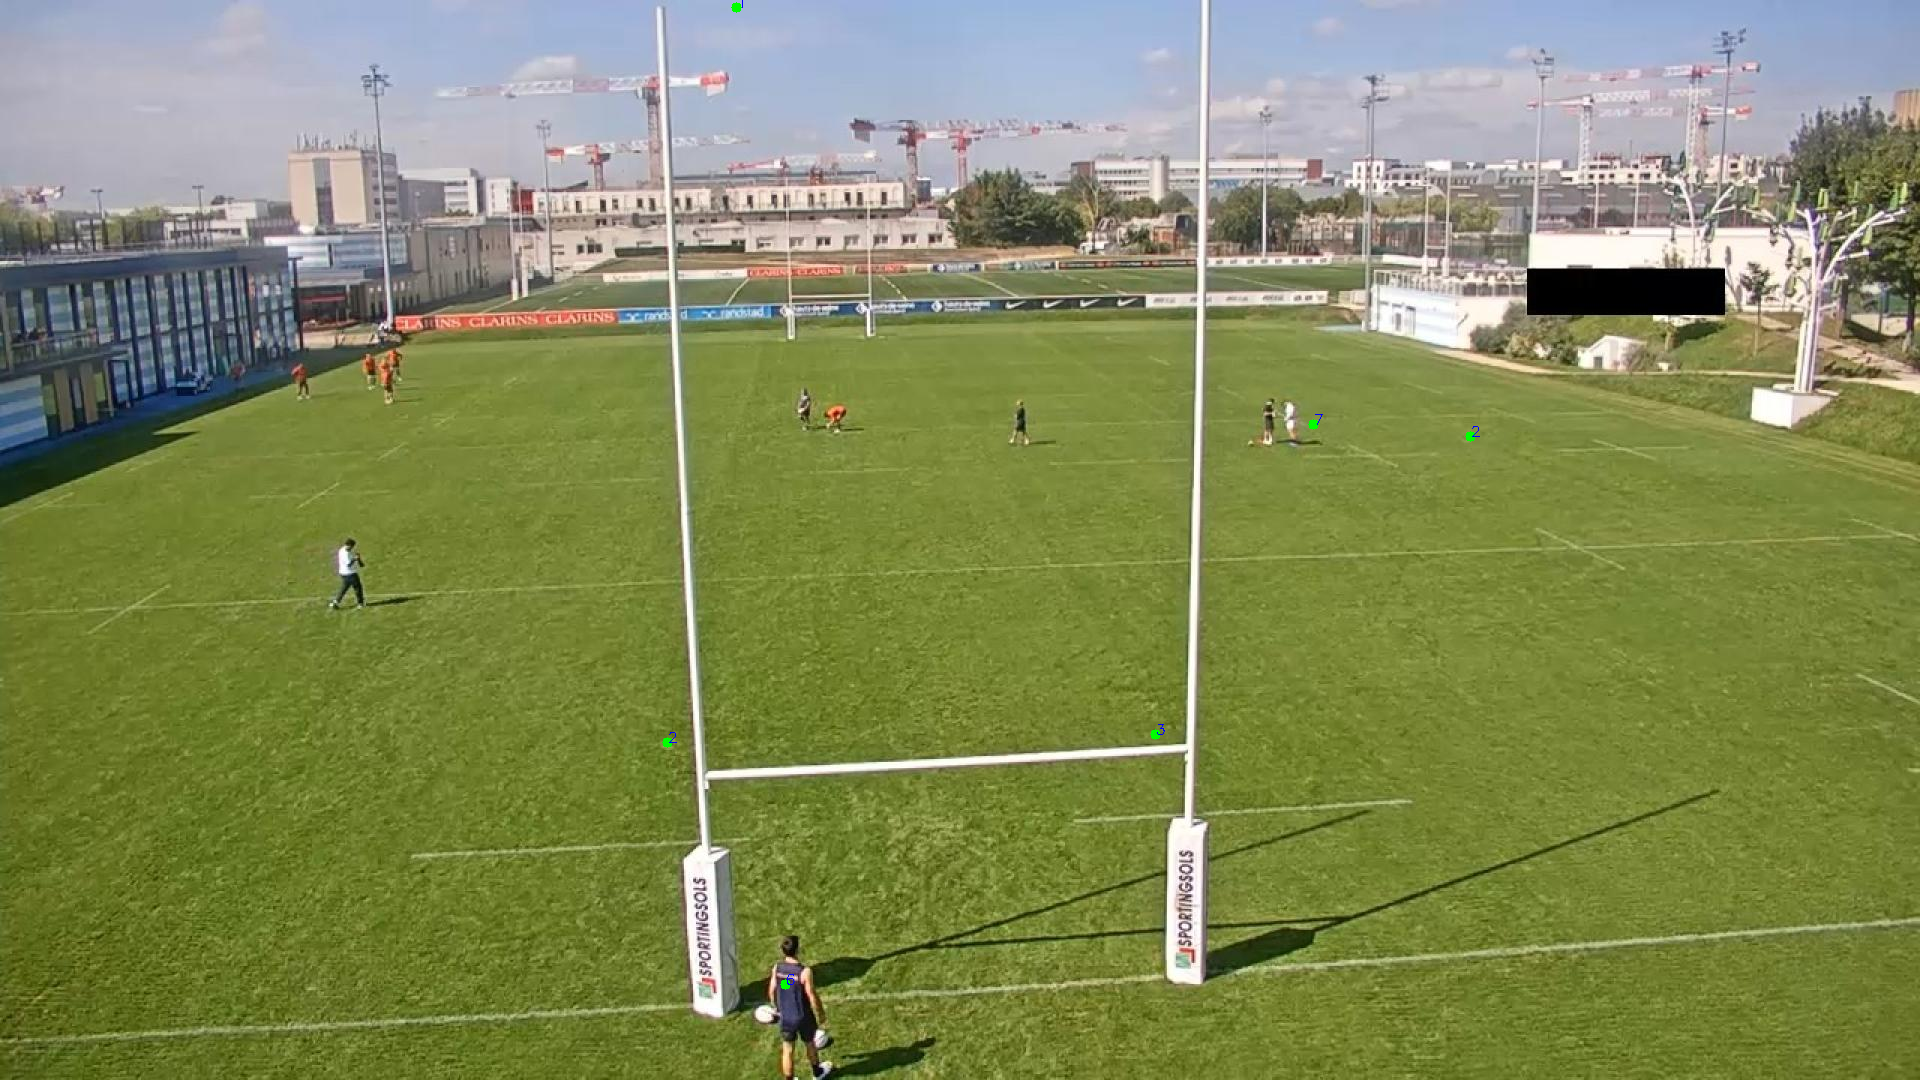

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Charger les modèles entraînés
model_poteaux = YOLO("/content/runs/pose/train/weights/best.pt")
model_terrain = YOLO("/content/runs/pose/train/weights/best.pt")

# Chemin de l'image
image_path = "/content/datasets/RUgby.Vision.Field-4/valid/images/2_mp4-0003_jpg.rf.c825ca9ff11aa6c2254504b2265e2c08.jpg"

# Effectuer une inférence pour chaque modèle
results_poteaux = model_poteaux(image_path)
results_terrain = model_terrain(image_path)

# Charger l'image
image = cv2.imread(image_path)

# Seuil de confiance minimum
confidence_threshold = 0.7

# Couleurs pour les keypoints des deux modèles
color_pteaux = (0, 255, 0)  # Vert pour le modèle "Pteaux"
color_terrain = (0, 0, 255)  # Rouge pour le modèle "Terrain"

# Ajouter les keypoints du modèle "Pteaux"
for instance_idx, keypoints in enumerate(results_poteaux[0].keypoints.data):
    for keypoint_idx, (x, y, conf) in enumerate(keypoints):
        if conf.item() >= confidence_threshold:
            # Dessiner le point clé
            cv2.circle(image, (int(x.item()), int(y.item())), 5, color_pteaux, -1)
            # Annoter avec l'ID du keypoint
            cv2.putText(
                image, f"P{keypoint_idx + 1}", (int(x.item()), int(y.item())),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=color_pteaux, thickness=1
            )

# Ajouter les keypoints du modèle "Terrain"
for instance_idx, keypoints in enumerate(results_terrain[0].keypoints.data):
    for keypoint_idx, (x, y, conf) in enumerate(keypoints):
        if conf.item() >= confidence_threshold:
            # Dessiner le point clé
            cv2.circle(image, (int(x.item()), int(y.item())), 5, color_terrain, -1)
            # Annoter avec l'ID du keypoint
            cv2.putText(
                image, f"T{keypoint_idx + 1}", (int(x.item()), int(y.item())),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=color_terrain, thickness=1
            )

# Afficher l'image avec les keypoints des deux modèles
cv2_imshow(image)


Placement des keypoint sur une vidéo

In [ ]:
import cv2
from ultralytics import YOLO

# Charger le modèle
model = YOLO("/content/runs/pose/train2/weights/best.pt")

# Charger la vidéo
video_path = "/content/datasets/RUgby.Vision.Field-2/valid/2.mp4"
output_path = "/content/output_video.mp4"
confidence_threshold = 0.7  # Seuil de confiance minimum

# Lire la vidéo
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec pour la vidéo de sortie
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

frame_idx = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Fin de la vidéo

    # Effectuer une inférence sur la frame
    results = model(frame)

    # Dessiner les keypoints sur la frame
    for instance_idx, keypoints in enumerate(results[0].keypoints.data):
        for keypoint_idx, (x, y, conf) in enumerate(keypoints):
            if conf.item() >= confidence_threshold:  # Vérifier la confiance
                # Dessiner le point clé
                cv2.circle(frame, (int(x.item()), int(y.item())), 5, (0, 255, 0), -1)
                # Annoter avec l'ID du keypoint
                cv2.putText(
                    frame, str(keypoint_idx + 1), (int(x.item()), int(y.item())),
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(255, 0, 0), thickness=1
                )

    # Ajouter la frame annotée à la vidéo de sortie
    out.write(frame)
    frame_idx += 1
    print(f"Frame {frame_idx} traitée")

# Libérer les ressources
cap.release()
out.release()
print(f"Vidéo annotée sauvegardée sous : {output_path}")


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
0: 384x640 1 poteaux, 1 terrain, 34.3ms
Speed: 3.2ms preprocess, 34.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Frame 17911 traitée

0: 384x640 1 poteaux, 1 terrain, 33.5ms
Speed: 2.1ms preprocess, 33.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
Frame 17912 traitée

0: 384x640 1 poteaux, 1 terrain, 34.5ms
Speed: 2.5ms preprocess, 34.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
Frame 17913 traitée

0: 384x640 1 poteaux, 1 terrain, 34.1ms
Speed: 2.2ms preprocess, 34.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
Frame 17914 traitée

0: 384x640 1 poteaux, 1 terrain, 33.9ms
Speed: 2.4ms preprocess, 33.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Frame 17915 traitée

0: 384x640 1 poteaux, 1 terrain, 34.3ms
Speed: 1.9ms preprocess, 34.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 